### Import all Libraries

In [5]:
import datascience as ds
from datascience import Table
import numpy as np

### 1.1 Question 1
#### Complete the function one resampled mean below. It should take in an original table data, with a column Score, and return the mean score of one resampling from data.


In [6]:
res=Table.read_table('../Data/restaurant_inspection_scores.csv').drop('Address','Facility ID')
restaurant_sample=res.sample(100, with_replacement=False)
def mean_resample(data): 
    re_data=data.select('Score').sample().column(0)
    return np.mean(re_data) 
this_mean=mean_resample(restaurant_sample)
this_mean
print('the mean score of one resampling from data is',this_mean)

the mean score of one resampling from data is 89.91


### 1.2 Question 2
#### Complete the function bootstrap scores below. It should take no arguments. It should simulate drawing 5000 resamples from restaurant sample and compute the mean restaurant score in each resample. It should return an array of those 5000 resample means.

In [8]:
def bootstrap_scores(): 
    resampled_means = ds.util.make_array()
    for i in range(5000):
        mean_of_resamples = mean_resample(restaurant_sample)
        mean_of_resampled = np.append(mean_of_resampled, mean_of_resamples)
    return mean_of_resampled
mean_of_resampled = bootstrap_scores() 
mean_of_resampled


array([92.74, 91.01, 91.07, ..., 90.12, 91.43, 91.52])

### 1.3 Question 3
#### Compute a 95 percent confidence interval for the average restaurant score using the array resampled means

In [3]:
lower_bound = np.percentile(mean_of_resampled,2.5)
upper_bound = np.percentile(mean_of_resampled,97.5)
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound,',',upper_bound,")")


95% confidence interval for the average restaurant score, computed by bootstrapping:
( 91.17 , 93.90025000000001 )


### 1.4 Question 4
#### What distribution is the histogram between question 2 and 3 displaying (that is, what data are plotted), and why does it have that shape?

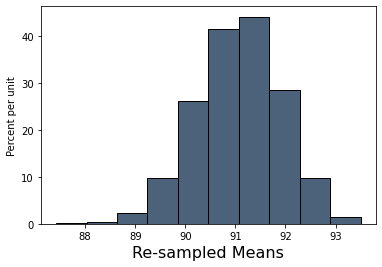

In [9]:
get_ipython().run_line_magic('matplotlib', 'inline')
Table().with_column('Re-sampled Means', mean_of_resampled).hist()

#### The data is normally distributed and 95% of data is between 91 to 94.

### 1.5 Question 5
#### Does the distribution of the sampled scores look normally distributed? State “yes” or “no” and describe in one sentence why you should expect this result.


##### yes, The sampled scores seems normally distributed. Because of Law of Average, As it applies when a random sample is selected from a huge population.

### 1.6 Question 6
#### Without referencing the array resampled means or performing any new simulations, calculate an interval around the sample mean that covers approximately 95% of the numbers in the resampled means array. This confidence interval should look very similar to the one you computed in Question 3.

In [5]:
smean = np.mean(restaurant_sample.column(3))
sample_SD = np.std(restaurant_sample.column(3))
sample_row_size = restaurant_sample.num_rows
Mean_SD = sample_SD/np.sqrt(sample_row_size)
lower_bound_distribution = smean-(2*Mean_SD)
upper_bound_distribution = smean+(2*Mean_SD)
print("95% confidence interval for the average restaurant score is \n({lower_bound_distribution},{upper_bound_distribution})")



95% confidence interval for the average restaurant score is 
(91.14315279581741,93.97684720418259)


### 2.1 Question 1
#### Define the function one statistic prop heads which should return exactly one simulated statistic of the proportion of heads from n coin flips

In [6]:
coin_proportions = ds.util.make_array(.5, .5) 
def statistics_one_heads(n):
    simulated_proportions = ds.util.sample_proportions(n, coin_proportions)
    prop_heads = simulated_proportions.item(0)
    return prop_heads
statistics_one_heads(10)


0.5

### 2.2 Question 2
#### Write a function called sample size n that takes in a sample size n. It should return an array that contains 5000 sample proportions of heads, each from n coin flips.

In [7]:
def sample_size_n(n):
    coin_proportions = ds.util.make_array(.5, .5) 
    heads_proportions = ds.util.make_array()
    for n in np.arange(5000):
        head_prop = statistics_one_heads(n)
        head_proportion = np.append(heads_proportions, head_prop)
    return head_proportion
sample_size_n(10)


array([0.4, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

### 2.3 Question 3
#### Write a function called empirical sample mean sd that takes a sample size n as its argument. The function should simulate 500 samples with replacement of size n from the flight delays dataset, and it should return the standard deviation of the means of those 500 samples.

In [9]:
delay_in_flight=Table.read_table("../Data/united_summer2015.csv")
def Mean_SD_emphirical(n):
    sample_means=ds.util.make_array()
    for n in np.arange(500):
        sample=delay_in_flight.sample(10, with_replacement=True)
        mean=np.mean(sample.column('Delay'))
        sample_means=np.append(sample_means,mean)
    return np.std(sample_means) 
Mean_SD_emphirical(10)


12.377757670919237

### 2.4 Question 4
#### Now, write a function called predict sample mean sd to find the predicted value of the standard deviation of means according to the relationship between the standard deviation of the sample mean and sample size that is discussed in the textbook. It takes a sample size n (a number) as its argument. It returns the predicted value of the standard deviation of the mean delay time for samples of size n from the flight delays (represented in the table united).

In [10]:
def predict_mean_standard_deviation(n):
    return np.std(delay_in_flight.column('Delay'))/n**0.5
predict_mean_standard_deviation(10)

12.484735400972708